 # project title: Sentiment analysis of covid 19 twitter data

In [3]:
#All requires libraries
import tweepy
import sys
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


In [8]:
 #variable that contain credentials 
twitterApiAccessToken=""
twitterApiAccessTokenSecret=""
twitterApiKey =""
twitterApiKeySecret=""
BEARER_TOKEN=""

In [9]:

auth_handler=tweepy.OAuthHandler(consumer_key=twitterApiKey,consumer_secret=twitterApiKeySecret)
auth_handler.set_access_token(twitterApiAccessToken,twitterApiAccessTokenSecret)


In [10]:
search_term='vaccine' #tweets contatining vaccine will be scrapped from twitter
tweet_amount=1500             #1500 tweets will be extracted

api = tweepy.API(auth_handler) #setting "wait_on_rate=true" helps us to extract large amout of tweets  

In [17]:
tweets=tweepy.Cursor(api.search_tweets,q=search_term,lang='en').items(tweet_amount)  #here tweets variable is an iterator object

In [18]:
type(tweets)

tweepy.cursor.ItemIterator

In [19]:
df =pd.DataFrame(data=[tweet.text for tweet in tweets],columns=['Tweet']) #creating a data frame and adding a column named tweet

In [20]:
type(df)

pandas.core.frame.DataFrame

In [22]:
df.head(50)

,Tweet
0,RT @TDF_Can: Julie Ponesse speaks with Dr. Cry...
1,RT @TorSunCity: B.C. man among first Canadians...
2,RT @nancyvictoria: B.C. man among first Canadi...
3,RT @adriandix: There’s a vaccine clinic open t...
4,RT @JedediahBila: But refuse an experimental “...
5,RT @drpatfarrell: PEOPLE: We are still stumbli...
6,RT @Lamiasdottir: Cuba might have a lung cance...
7,"RT @USEmbDushanbe: With new delivery of 198,90..."
8,RT @shayxonline: we are halfway thru 2022 and ...
9,RT @JedediahBila: But refuse an experimental “...


In [23]:
# funtion for cleaning the text which contatin ssymbols numbers
def cleanUpTweet(txt):
    txt=re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", txt)
    return txt                                                        

In [24]:
#cleaning the text
df['Tweet']=df['Tweet'].apply(cleanUpTweet)
df.head(50)                                     


,Tweet
0,RT Can Julie Ponesse speaks with Dr Crysta...
1,RT B C man among first Canadians approved ...
2,RT B C man among first Canadians approved ...
3,RT There s a vaccine clinic open today thru...
4,RT But refuse an experimental vaccine and...
5,RT PEOPLE We are still stumbling in the va...
6,RT Cuba might have a lung cancer vaccine bu...
7,RT With new delivery of 198 900 doses of th...
8,RT we are halfway thru 2022 and y all are s...
9,RT But refuse an experimental vaccine and...


In [25]:
#using module textblob we can get the subjectivity of each tweet
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [26]:
#using module textblob we can get the polarity of each tweet
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [27]:
df['Subjectivity']=df['Tweet'].apply(getTextSubjectivity)
df['Polarity']=df['Tweet'].apply(getTextPolarity)

In [28]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,RT Can Julie Ponesse speaks with Dr Crysta...,0.250000,0.000000
1,RT B C man among first Canadians approved ...,0.333333,0.250000
2,RT B C man among first Canadians approved ...,0.333333,0.250000
3,RT There s a vaccine clinic open today thru...,0.500000,0.000000
4,RT But refuse an experimental vaccine and...,0.467857,0.192857
5,RT PEOPLE We are still stumbling in the va...,0.500000,0.416667
6,RT Cuba might have a lung cancer vaccine bu...,0.000000,0.000000
7,RT With new delivery of 198 900 doses of th...,0.454545,0.136364
8,RT we are halfway thru 2022 and y all are s...,0.600000,-0.400000
9,RT But refuse an experimental vaccine and...,0.467857,0.192857


In [29]:
df = df.drop(df[df['Tweet']==''].index) #to drop all blank tweets

In [30]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,RT Can Julie Ponesse speaks with Dr Crysta...,0.250000,0.000000
1,RT B C man among first Canadians approved ...,0.333333,0.250000
2,RT B C man among first Canadians approved ...,0.333333,0.250000
3,RT There s a vaccine clinic open today thru...,0.500000,0.000000
4,RT But refuse an experimental vaccine and...,0.467857,0.192857
5,RT PEOPLE We are still stumbling in the va...,0.500000,0.416667
6,RT Cuba might have a lung cancer vaccine bu...,0.000000,0.000000
7,RT With new delivery of 198 900 doses of th...,0.454545,0.136364
8,RT we are halfway thru 2022 and y all are s...,0.600000,-0.400000
9,RT But refuse an experimental vaccine and...,0.467857,0.192857


In [31]:
 #function to return if the polarity is neagtive postive or neutral
def getTextAnalysis(a):
    
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"

In [32]:
#adding a new column named scoret
df["Score"]=df['Polarity'].apply(getTextAnalysis)

In [33]:
df.head(50)

,Tweet,Subjectivity,Polarity,Score
0,RT Can Julie Ponesse speaks with Dr Crysta...,0.250000,0.000000,Neutral
1,RT B C man among first Canadians approved ...,0.333333,0.250000,Positive
2,RT B C man among first Canadians approved ...,0.333333,0.250000,Positive
3,RT There s a vaccine clinic open today thru...,0.500000,0.000000,Neutral
4,RT But refuse an experimental vaccine and...,0.467857,0.192857,Positive
5,RT PEOPLE We are still stumbling in the va...,0.500000,0.416667,Positive
6,RT Cuba might have a lung cancer vaccine bu...,0.000000,0.000000,Neutral
7,RT With new delivery of 198 900 doses of th...,0.454545,0.136364,Positive
8,RT we are halfway thru 2022 and y all are s...,0.600000,-0.400000,Negative
9,RT But refuse an experimental vaccine and...,0.467857,0.192857,Positive


#  below code uses matplotlib and uses data from the above data frame to plot graphs

In [34]:
positive=df[df["Score"]=="Positive"]
print(str(positive.shape[0]/(df.shape[0])*100)+"% of positive tweets")
pos=positive.shape[0]/df.shape[0]*100

33.53333333333333% of positive tweets


In [35]:
negative=df[df["Score"]=="Negative"]
print(str(negative.shape[0]/(df.shape[0])*100)+"% of negative tweets")
neg=negative.shape[0]/df.shape[0]*100

23.533333333333335% of negative tweets


In [36]:
neutral=df[df["Score"]=="Neutral"]
print(str(neutral.shape[0]/(df.shape[0])*100)+"% of neutral tweets")
neu=neutral.shape[0]/df.shape[0]*100

42.93333333333334% of neutral tweets


In [37]:
#TO PLOT IN PI CHART
explode=(0,0.1,0)
labels='Positive','Negative','Neutral'
sizes=[pos,neg,neu]
colors=['red','blue','green']

(-1.1018247658784934,
 1.1143448294137224,
 -1.235389700121611,
 1.1302687734954326)

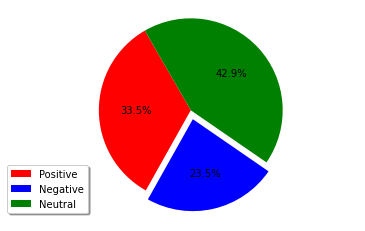

In [38]:
#plotting using matplotlib
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-.05,0.05),shadow=True)
plt.axis('equal')


<BarContainer object of 3 artists>

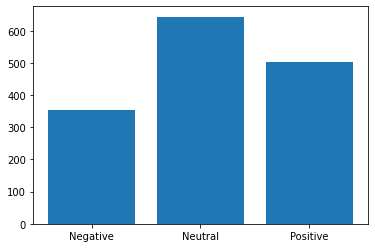

In [39]:
labels=df.groupby('Score').count().index.values
values=df.groupby('Score').size().values
plt.bar(labels,values)

NameError: name 'l' is not defined